In [39]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [40]:
record = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/session_record.csv',index_col=0)

In [41]:
record.shape

(686, 16)

## Extract sessions

In [42]:
K7 = record[((record['Mouse ID']=='K7') & (record['p(high Port)'] > 0))].copy()
K9 = record[((record['Mouse ID']=='K9') & (record['p(high Port)'] > 0))].copy()
K13 = record[((record['Mouse ID']=='K13') & (record['p(high Port)'] > 0))].copy()

q43_ = record[((record['Mouse ID']=='q43') & (record['p(high Port)'] > 0))].copy()
q45_ = record[((record['Mouse ID']=='q45') & (record['p(high Port)'] > 0))].copy()
K1_ = record[((record['Mouse ID']=='K1') & (record['p(high Port)'] > 0))].copy()
K1 = K1_.loc[543:].copy()
q43 = q43_.loc[623:].copy()
q45 = q45_.loc[644:].copy()

mice = [K7,K9,K13,K1,q43,q45]

(0.5, 1.0)

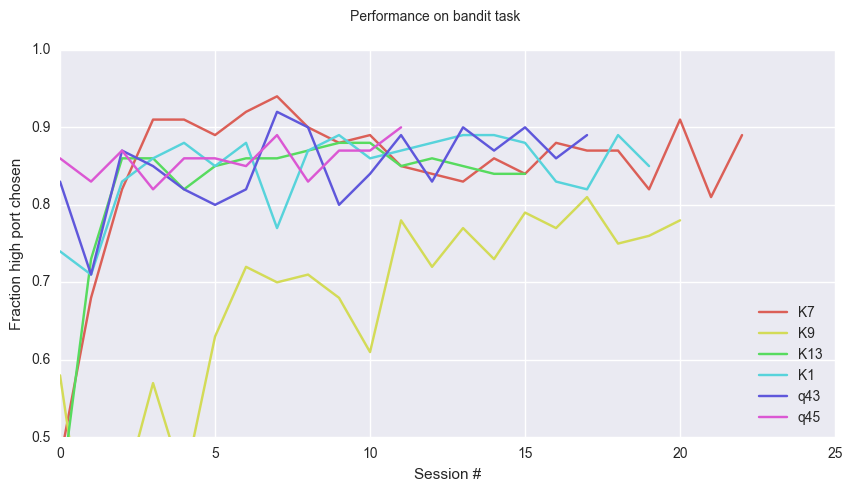

In [5]:
colorz = sns.color_palette('hls',n_colors=6)
fig = plt.figure(figsize=(10,5))
plt.suptitle('Performance on bandit task')

for i,mouse in enumerate(mice):
    
    plt.plot(range(mouse.shape[0]),mouse['p(high Port)'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
    
    switch_90 = np.where(((mouse['Left Reward Prob'] == 0.1) | (mouse['Left Reward Prob'] == 0.9)))[0][0]
    
    #plt.vlines(x=switch_90,ymin=0,ymax=1,linestyles='dotted',colors=colorz[i])
    
plt.legend(loc='lower right')
plt.xlabel('Session #')
plt.ylabel('Fraction high port chosen')
plt.ylim(0.5,1.0)

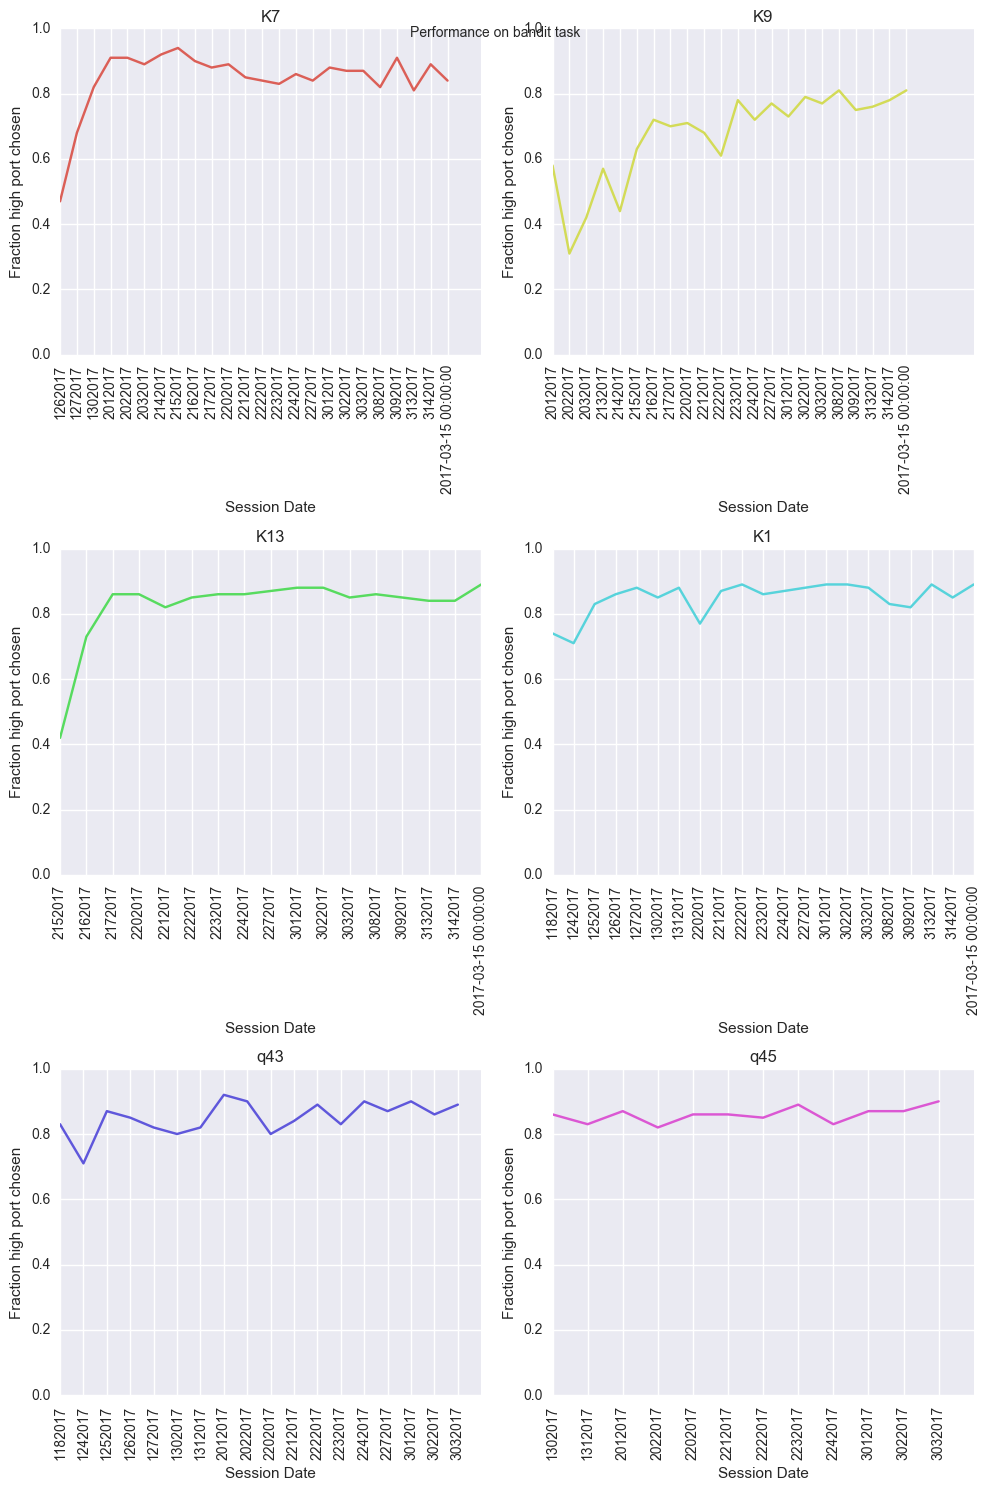

In [43]:
colorz = sns.color_palette('hls',n_colors=6)
fig = plt.figure(figsize=(10,15))
plt.suptitle('Performance on bandit task')

for i,mouse in enumerate(mice):
    
    #extract the dates
    dates = []
    for date in mouse['Date'].values:
        dates.append(str(date))
    
    plt.subplot(3,2,i+1)
    plt.title(mouse['Mouse ID'].values[0])
    plt.plot(range(mouse.shape[0]),mouse['p(high Port)'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
    plt.xticks(range(mouse.shape[0]),mouse['Date'].values,rotation=90)
    plt.ylim(0,1)
    plt.xlabel('Session Date')
    plt.ylabel('Fraction high port chosen')
    plt.ylim(0,1.0)

plt.tight_layout()

In [21]:
mouse['Date'] = dates

(0, 1)

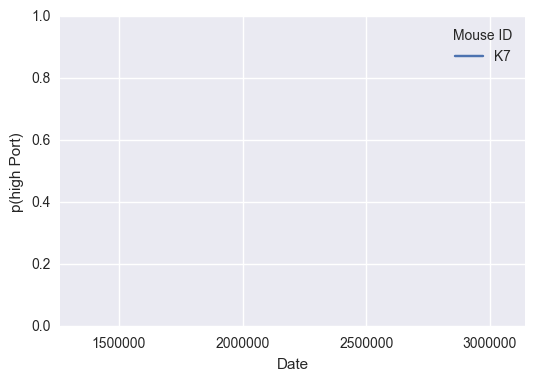

In [23]:
sns.tsplot(data = mouse,time='Date',value='p(high Port)',condition='Mouse ID')
plt.ylim(0,1)

In [37]:
np.where(((np.diff(mouse['Left Reward Prob'].values) < 0.4) & (np.diff(mouse['Left Reward Prob'].values) > 0)) is True)

(array([], dtype=int64),)

In [32]:
mouse['Left Reward Prob'].values

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.9,  0.9,  0.9,  0.9,  0.1,  0.1,
        0.1])

In [38]:
mouse

,Session ID,Mouse ID,Date,Phase,Left Reward Prob,Right Reward Prob,Block Range Min,Block Range Max,No. Trials,No. Blocks,No. Rewards,p(high Port),Decision Window Duration,Min Inter-trial-interval,Left Solenoid Duration,Right Solenoid Duration
644,01302017_q45,q45,1302017,2.0,0.1,0.9,50.0,50.0,529.0,8.0,425.0,0.86,2.0,1.0,35.0,35.0
645,01312017_q45,q45,1312017,2.0,0.1,0.9,50.0,50.0,532.0,7.0,393.0,0.83,2.0,1.0,35.0,35.0
646,02012017_q45,q45,2012017,2.0,0.1,0.9,50.0,50.0,515.0,8.0,407.0,0.87,2.0,1.0,35.0,35.0
647,02022017_q45,q45,2022017,2.0,0.1,0.9,50.0,50.0,467.0,7.0,356.0,0.82,2.0,1.0,35.0,35.0
648,02202017_q45,q45,2202017,2.0,0.1,0.9,50.0,50.0,510.0,7.0,390.0,0.86,2.0,1.0,35.0,35.0
649,02212017_q45,q45,2212017,2.0,0.9,0.1,50.0,50.0,719.0,11.0,561.0,0.86,2.0,1.0,35.0,35.0
650,02222017_q45,q45,2222017,2.0,0.9,0.1,50.0,50.0,553.0,8.0,430.0,0.85,2.0,1.0,35.0,35.0
651,02232017_q45,q45,2232017,2.0,0.9,0.1,50.0,50.0,462.0,7.0,381.0,0.89,2.0,1.0,35.0,35.0
652,02242017_q45,q45,2242017,2.0,0.9,0.1,50.0,50.0,420.0,6.0,328.0,0.83,2.0,1.0,35.0,35.0
653,03012017_q45,q45,3012017,2.0,0.1,0.9,50.0,50.0,497.0,7.0,396.0,0.87,2.0,1.0,35.0,35.0
